# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi ogólne:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> ` # YOUR CODE HERE`<br/> ` raise NotImplementedError()`<br/> Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z funkcji przygotowanych w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce.
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, mieć nadane tytuły, opisane osie oraz odpowiednio dobrany rozmiar, wielkość punktów i grubość linii. Proporcje osi wykresów przedstawiających rozkłady punktów powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa grupy, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków grupy) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$. 

In [1]:
NAME = "GIN21"
COLLABORATORS = "Szymon Marczak 405302, Dawid Makowski 407894, Tomasz Sanicki 408056"

---

## Zestaw zadań 5: Badanie relacji między punktami (część 2)

In [3]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
sns.set() 
sns.set_theme(style="whitegrid")

In [5]:
# Miejsce do wklejenie funkcji ze wcześniejszych zestawów zadań
# YOUR CODE HERE
# Miejsce do wklejenie funkcji ze wcześniejszych zestawów zadań
# YOUR CODE HERE

#Proces rergularny

def regular_on_rectangle(grid, random_component, x_lim, y_lim):
    
    tab = np.zeros((grid[0] * grid[1], 2)) #Tworzę tablicę dla procesu regularnego ze współrzędnymi punktów w tym procesie (incjalizacja zerami)
    
    #Ustalam odległość w danej płaszczyźnie w równomiernej siatce punktów
    dx = (x_lim[1] - x_lim[0]) / grid[0] 
    dy = (y_lim[1] - y_lim[0]) / grid[1]
    
    #Pętla przebiegająca poziomo po punktach
    for i in range(0, grid[0]):
        #Pętla przebiegająca po każdej kolumnie punktów
        for j in range(0, grid[1]):
            
            #Współrzędna punktu = połowa odległości dx/dy (dla początku) + odległość dx razy iteracja + element losowy (w zakresie +-random_component)
            tab[grid[1] * i + j, 0] = dx * (i + 0.5) + random_component * (np.random.rand() - 0.5) * dx
            tab[grid[1] * i + j, 1] = dy * (j + 0.5) + random_component * (np.random.rand() - 0.5) * dy
    
    return pd.DataFrame({"X":tab[:,0], "Y":tab[:,1]}) #zwracam DataFrame'a
    

#Proces nieregularny o jednorodnej intensywności

def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    
    x = np.random.poisson(intensity * x_lim[1] * y_lim[1]) #Generuję proces Poissona o liczbie punktów wg wzoru liczba = intensywność * pole
    tab = np.zeros((x,2)) #Tworzę tablicę zer z tą liczbą punktów
    
    #Współrzęna = Element losowy w zakresie (zakres = rand(0,1) * (góra - dół) + dół)
    for i in range(x):
        
        tab[i,0] += np.random.rand() * (x_lim[1] - x_lim[0]) + x_lim[0]
        tab[i,1] += np.random.rand() * (y_lim[1] - y_lim[0]) + y_lim[0]
        
    return pd.DataFrame({"X":tab[:,0], "Y":tab[:,1]}) #Zwracam DataFrame'a
    
#Proces Materna

def materna_on_rectangle(parent_intensity, daughter_intensity, cluster_radius, x_lim, y_lim):

    #PROCES RODZICIELSKI
    ile = np.random.poisson(parent_intensity * x_lim[1] * y_lim[1]) #Obliczam ile może być punktów losowych rozkładu rodzicielskiego
    df_parent =  pd.DataFrame(columns  = ["X", "Y"]) #DataFrame na punkty procesu rodzicielskiego
    
    #Współrzędne punktów procesu rodzicielskiego
    for i in range(ile):
        x = np.random.rand() * (x_lim[1] - x_lim[0]) + x_lim[0]
        y = np.random.rand() * (y_lim[1] - y_lim[0]) + y_lim[0]
        df_parent.loc[len(df_parent.index)] = [x,y]
    
    #PROCES POTOMNY
    points = pd.DataFrame(columns  = ["X", "Y"]) #DataFrame na punkty procesu potomnego
    liczba_punktow_procesu = int(daughter_intensity*np.pi*cluster_radius**2) #liczba punktów procesu potomnego dla pętli for liczba = intensywnosc * pole
    
    #Pętla przebiegająca po każdym skupieniu
    for i in range(ile): 
         #Pętla przebiegająca po każdym punkcie w danym skupieniu
        for j in range(liczba_punktow_procesu):
            
            #Generuję punkt w procesie równomiernego rozłożenia w kole
            angle = np.random.rand() * 2 * np.pi #losowy kąt
            radius = cluster_radius * np.sqrt(np.random.rand()) #losowy promień
            
            #Współrzędne punktu w kole względem jego środka
            x_wsp_rand = np.cos(angle) * radius
            y_wsp_rand = np.sin(angle) * radius
            
            #Dodaję współrzędne środka koła (skupienia) do współrzędnych punktu, żeby przypisać go do danego skupienia
            x = x_wsp_rand + df_parent["X"][i]
            y = y_wsp_rand + df_parent["Y"][i]
            
            #Warunek czy dany punkt znajduje się w zakresie ustalonym w parametrach funkcji (x_lim i y_lim)
            if x <= x_lim[1] and y <= y_lim[1] and x >= x_lim[0] and y >= y_lim[0]:
                
                #Tylko punkty znajdujące się w prostokącie zostają dopisane do DataFrame'a
                #Wstawiam na nowy indeks (indeks o numerze długości DataFrame'a jest o jeden dalej niż dotychczasowy, ostatni indeks)
                points.loc[len(points.index)] = [x,y]
                
    return points #Zwracam DataFrame'a


#raise NotImplementedError()

### Przygotowanie danych

Korzystając z funkcji przygotowanych w ramach pierwszego zestawu zadań wygeneruj rozkłady punktowe o podanych paramatrach.

Jednorodny rozkład Poissona:
 - intensywność procesu: 2.5

Rozkład regularny z komponentem losowym:
- liczba punktów w poziomie i w pionie: 15x15
- komponent losowy: 0.75

Rozkład Materna:
 - intensywność procesu macierzystego: 0.3
 - intensywność procesu potomnego: 5
 - promień klastra: 0.75
 
Parametry identyczne dla wszystkich rozkładów:
 - zakres wartości współrzędnej x: [0, 10]
 - zakres wartości współrzędnej y: [0, 10]
 
UWAGA! Dane do wygenerowania są identyczne jak w poprzednim zestawie zadań.

In [6]:
# YOUR CODE HERE

tab1 = pd.read_csv("dane_tymczasowe_HP 1.csv")
tab2 = pd.read_csv("dane_tymczasowe_M 1.csv")
tab3 = pd.read_csv("dane_tymczasowe_R 1.csv")

tab_homo_poisson = homogeneous_poisson_on_rectangle(2.5, [0,10], [0,10])
tab_matern = materna_on_rectangle(0.3, 5, 0.75, [0,10], [0,10])
tab_regular = regular_on_rectangle([15,15], 0.75, [0,10], [0,10])

#fig, ax = plt.subplots()
#ax.scatter(data = tab1, x = "X", y = "Y", color = "blue", s = 10)
#ax.scatter(data = tab2, x = "X", y = "Y", color = "green")
#ax.scatter(data = tab3, x = "X", y = "Y", color = "red", s =10)

#raise NotImplementedError()

### Zadanie 1: Funkcja G (25 pkt)

Przygotuj funkcję `g_function()`, która będzie generować dane niezbędne do wykonania wykresu funkcji G analizowanego rozkładu punktów oraz funkcję `g_function_poisson()`, która będzie generować dane niezbędne do wykonania wykresu teoretycznej funkcji G jednorodnego rozkładu Poissona danej wzorem: <br/>
$G(d) = 1 - exp(-\lambda \pi d^2)$ <br/>
gdzie: $\lambda$ - intensywność procesu, $d$ - odległość.

Następnie wykorzystaj przygotowane funkcje do wygnenerowania danych dla wszystkich przygotowanych rozkładów punktów. 

Przedstaw wyniki analizy graficznie w postaci wykresów liniowych funkcji G przygotowanych rozkładów punktów zestawionych z teoretyczną funkcją G jednorodnego rozkładu Poissona o intensywności $2.5$. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym wierszu, a wykresy funkcji G w dolnym wierszu figury. <br/>
Uwaga! Porównywane wykresy funkcji G powinny zaczynać się od $d=0$ (co może wymagać uzupełnienia danych o 0 w obrębie funkcji `g_function()`) i kończyć na wartości $d$, dla której funkcja G analizowanego rozkładu punktów osiąga wartość 1.

Algorytm postępowania:
1) Dla każdego z punktów analizowanego rozkładu wyliczamy dystans do jego najbliższego sąsiada $d_{min}$.
2) Konstruujemy funkcję G jako dystrybuantę rozkładu odległości: <br/>
    $G(d) = \frac{n_{d_{min} \le d}}{n}$  <br/>
    gdzie: $n_{d_{min} \le d}$ - liczba punktów, dla których odległość do najbliższego sąsiada $d_{min}$ jest mniejsza lub równa $d$, $n$ - liczba punktów.

#### a) Przygotowanie funkcji

In [24]:
def g_function(points):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G.
    """   
    # YOUR CODE HERE
    
    d = np.zeros(len(points['X'])) #Tablica na minimalne odległości (odległości do najbliższego sąsiada)
    
    #Dla każdego punktu liczę odległości do wszystkich punktów
    for i in range (len(points['X'])):
        odleglosc = np.zeros(len(points['X'])) #Tablica odległości do każego punktu
        odleglosc = np.sqrt((points['X'][i] - points['X'])**2 + (points['Y'][i] - points['Y'])**2) #Wzór na odległość
        odleglosc = np.sort(odleglosc) #Sortuję odległości od najmniejszej do największej
        d[i] = odleglosc[1] #Odległość do najbliższego sąsiada (nie licząc odległości do samego siebie)
    
    d = np.sort(d) #Sortuję odległości do najbliższego sąsiada
    du = np.unique(d) #Bierzemy tylko unikalne wartości

    G = np.zeros(len(du)) #Tablica na wartości funkcji G (o długości równej liczbie unikalnych wartości odległości do najbliższego sąsiada)
    
    #Dla każdej unikalnej odległości do najbliższego sąsiada (z tablicy du)
    for i in range(len(du)):
        x = 0 #x - wartość wszystkich odległości do najbliższego sąsiada mniejszych od danej odległości do najbliższego sąsiada
        
        #Pętla przebiegająca po każdej (dla nieunikalnych) wartości odległości do najbliższego sąsiada
        for j in range (len(d)):
            if(du[i] > d[j]): #Jeśli wartość odległość do najbliższego sąsiada jest mniejsza od tej dla której wyznaczamy indeks
                x += 1 #To dodajemy jeden
        G[i] = x #Przypisujemy wartość danego indeksu do G

    G = G / max(G) #Normalizacja wartości funkcji G do tych w zakresie (0,1) - dzielimy przez maksymalną wartość funkcji G 
    
    df = pd.DataFrame({'D':du,'G':G})
    
    return(df)   
    
    #raise NotImplementedError()
    
def g_function_poisson(d, intensity):
    """
    Parameters
    -------
    d: array
        Macierz zawierająca odległości, dla których ma zostać wyznaczona wartość funkcji G.
    intensity: float
        Liczba dodatnia określająca intensywność jednorodnego procesu Poissona.
    
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G. 
    """  
    # YOUR CODE HERE
    
    #Wyliczam teoretyczną wartość funkcji G na podstawie wzoru, mając już wcześniej wyliczone unikalne wartości odległości do najbliższego sąsiada
    G = 1 - np.exp(-intensity * np.pi * d**2)
    
    g = pd.DataFrame({'D':d, 'G':G})
    
    
    
    return(g)
    
    #raise NotImplementedError()

#### b) Wygenerowanie danych

In [11]:
# YOUR CODE HERE

g_poisson = g_function(tab_homo_poisson)
g_poisson_t = g_function_poisson(g_poisson['D'], 2.5)
g_regular = g_function(tab_regular)
g_regular_t = g_function_poisson(g_regular['D'], 2.5)
g_matern = g_function(tab_matern)
g_matern_t = g_function_poisson(g_matern['D'], 2.5)

#raise NotImplementedError()

#### c) Wizualizacja

<AxesSubplot: xlabel='X', ylabel='Y'>

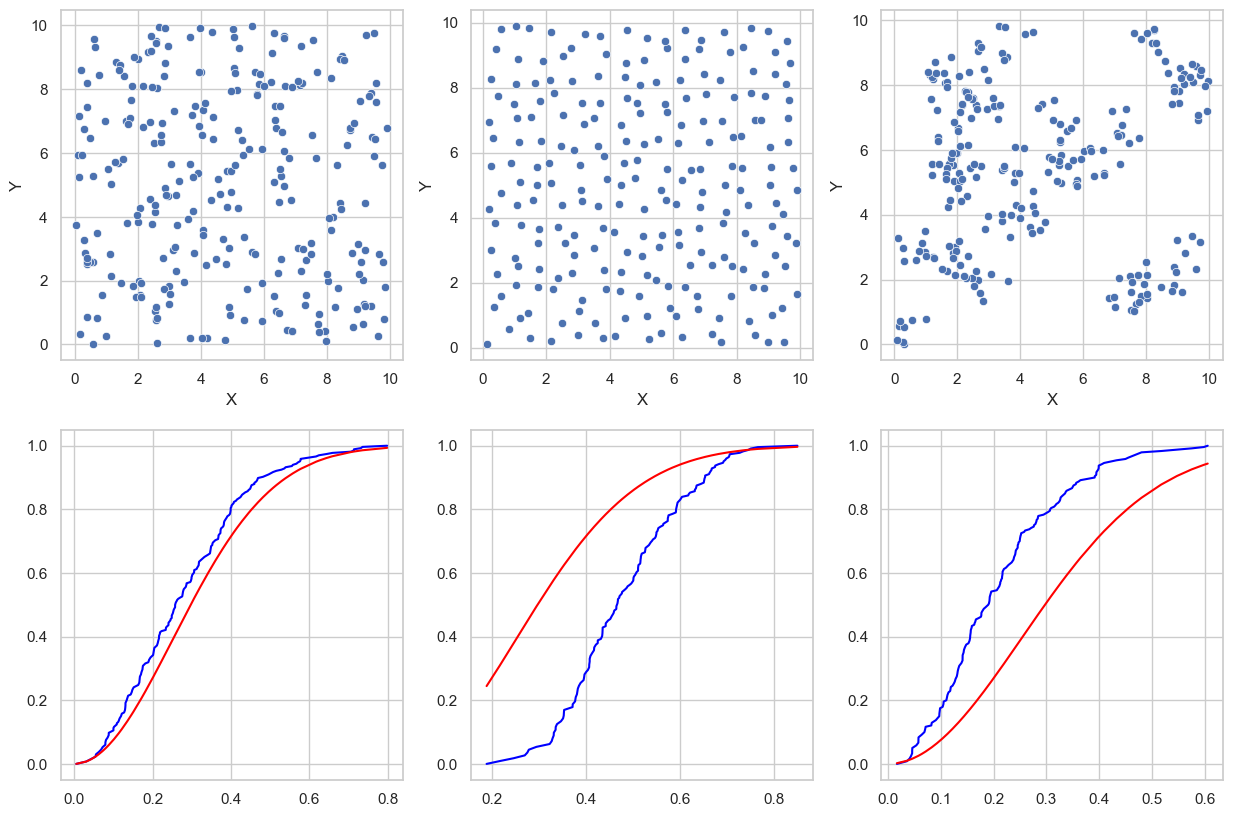

In [33]:
# YOUR CODE HERE

lab_gt = "G_poiss(x)"
lab_g = "G_test(x)"

fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (15,10))
axs[1,0].plot(g_poisson['D'], g_poisson['G'], color = "blue", label = lab_g)
axs[1,0].plot(g_poisson_t['D'], g_poisson_t['G'], color = "red", label = lab_gt)
axs[1,1].plot(g_regular['D'], g_regular['G'], color = "blue", label = lab_g)
axs[1,1].plot(g_regular_t['D'], g_regular_t['G'], color = "red", label = lab_gt)
axs[1,2].plot(g_matern['D'], g_matern['G'], color = "blue", label = lab_g)
axs[1,2].plot(g_matern_t['D'], g_matern_t['G'], color = "red", label = lab_gt)
sns.scatterplot(data = tab_homo_poisson, x = 'X', y = 'Y', ax = axs[0,0])
sns.scatterplot(data = tab_regular, x = 'X', y = 'Y', ax = axs[0,1])
sns.scatterplot(data = tab_matern, x = 'X', y = 'Y', ax = axs[0,2])




#raise NotImplementedError()

### Zadanie 2: Funkcja F (25 pkt)

Przygotuj funkcję `f_function()`, która będzie generować dane niezbędne do wykonania wykresu funkcji F analizowanego rozkładu punktów oraz funkcję `f_function_poisson()`, która będzie generować  dane niezbędne do wykonania wykresu teoretycznej funkcji F jednorodnego rozkładu Poissona danej wzorem: <br/>
$F(d) = 1 - exp(-\lambda \pi d^2)$ <br/>
gdzie: $\lambda$ - intensywność procesu, $d$ - odległość.

Następnie wykorzystaj przygotowane funkcje do wygnenerowania danych dla wszystkich przygotowanych rozkładów punktów. 

Przedstaw wyniki analizy graficznie w postaci wykresów liniowych funkcji F przygotowanych rozkładów punktów zestawionych z teoretyczną funkcją F jednorodnego rozkładu Poissona o intensywności $2.5$. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym wierszu, a wykresy funkcji F w dolnym wierszu figury. <br/>
Uwaga! Porównywane wykresy funkcji F powinny zaczynać się od $d=0$ (co może wymagać uzupełnienia danych o 0 w obrębie funkcji `f_function()`) i kończyć na wartości $d$, dla której funkcja F analizowanego rozkładu punktów osiąga wartość 1.

Algorytm postępowania:
1) Z wykorzystaniem procesu regularnego lub jednorodnego procesu Poissona generujemy w obrębie analizowanego rozkładu zestaw punktów pomiarowych.
2) Dla każdego z punktów rozkładu pomiarowego wyliczamy dystans do jego najbliższego sąsiada z analizowanego rozkładu $d_{min}$.
3) Konstruujemy funkcję F jako dystrybuantę rozkładu odległości: <br/>
    $F(d) = \frac{n_{d_{min} \le d}}{n}$  <br/>
    gdzie: $n_{d_{min} \le d}$ - liczba punktów rozkładu pomiarowego, dla których odległość do najbliższego sąsiada z analizowanego rozkładu $d_{min}$ jest mniejsza lub równa $d$, $n$ - liczba punktów rozkładu pomiarowego.
    
Uwaga! Liczba punktów rozkładu pomiarowego jest istotna i wpływa na dokładność rozwiązania.

#### a) Przygotowanie funkcji

In [28]:
def f_function(points, test_points):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów analizowanego rozkłądu opisane jako "X" i "Y".
    test_points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów pomiarowych, dla których mają zostać wyznaczone odległości
        do najbliższego sąsiada z analizowanego rozkładu opisane jako "X" i "Y".
    
    Returns
    -------
    f: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji F,
        - "F" - zawierającą wyliczone wartości funkcji F.
    """   
    # YOUR CODE HERE
    
    d = np.zeros(len(points['X'])) #Tablica na minimalne odległości (odległości do najbliższego sąsiada)
    
    #Dla każdego punktu rozkładu teoretycznego (czerwone punktu) liczę odległości do wszystkich punktów niebieskich
    for i in range (len(points['X'])):
        odleglosc = np.zeros(len(points['X']))  #Tablica odległości do każego punktu
        odleglosc = np.sqrt((test_points['X'] - points['X'][i])**2 + (test_points['Y'] - points['Y'][i])**2) #Wzór na odległość
        odleglosc = np.sort(odleglosc) #Sortuję odległości do najbliższego niebieskiego sąsiada
        d[i] = odleglosc[0] #Odległość do najbliższego niebieskiego sąsiada (nie ma odległości do samego siebie)
    
    d = np.sort(d) #Sortuję odległości do najbliższego sąsiada
    du = np.unique(d) #Bierzemy tylko unikalne wartości

    
    
    
    
    
    
    
    
    F = np.zeros(len(du)) #Tablica na wartości funkcji G (o długości równej liczbie unikalnych wartości odległości do najbliższego sąsiada)
    
    #Dla każdej unikalnej odległości do najbliższego sąsiada (z tablicy du)
    for i in range(len(du)):
        x = 0 #x - wartość wszystkich odległości do najbliższego sąsiada mniejszych od danej odległości do najbliższego sąsiada
        
        #Pętla przebiegająca po każdej (dla nieunikalnych) wartości odległości do najbliższego sąsiada
        for j in range (len(d)):
            if(du[i] > d[j]): #Jeśli wartość odległość do najbliższego sąsiada jest mniejsza od tej dla której wyznaczamy indeks
                x += 1 #To dodajemy jeden
        F[i] = x #Przypisujemy wartość danego indeksu do G

    F = F / max(f) #Normalizacja wartości funkcji G do tych w zakresie (0,1) - dzielimy przez maksymalną wartość funkcji G 
    
    df = pd.DataFrame({'D':du,'F':F})
    return(df)
                 
    #raise NotImplementedError()
    
def f_function_poisson(d, intensity):
    """
    Parameters
    -------
    d: array
        Macierz zawierająca odległości, dla których ma zostać wyznaczona wartość funkcji F.
    intensity: float
        Liczba dodatnia określająca intensywność jednorodnego procesu Poissona.

    Returns
    -------
    f: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji F,
        - "F" - zawierającą wyliczone wartości funkcji F.
    """  
    # YOUR CODE HERE
    
    #Wyliczam teoretyczną wartość funkcji G na podstawie wzoru, mając już wcześniej wyliczone unikalne wartości odległości do najbliższego sąsiada
    F = 1 - np.exp(-intensity * np.pi * d**2)
    
    f = pd.DataFrame({'D':d, 'F':F})
    

    return f

    #raise NotImplementedError()

#### b) Wygenerowanie danych

In [27]:
# YOUR CODE HERE

tab_teor = homogeneous_poisson_on_rectangle(2.5, [0,10], [0,10])

f_poisson = f_function(tab_teor, tab_homo_poisson)
f_poisson_t = f_function_poisson(f_poisson['D'], 2.5)
f_regular = f_function(tab_teor, tab_regular)
f_regular_t = f_function_poisson(f_regular['D'], 2.5)
f_matern = f_function(tab_teor, tab_matern)
f_matern_t = f_function_poisson(f_matern['D'], 2.5)


#raise NotImplementedError()

#### c) Wizualizacja

<AxesSubplot: xlabel='X', ylabel='Y'>

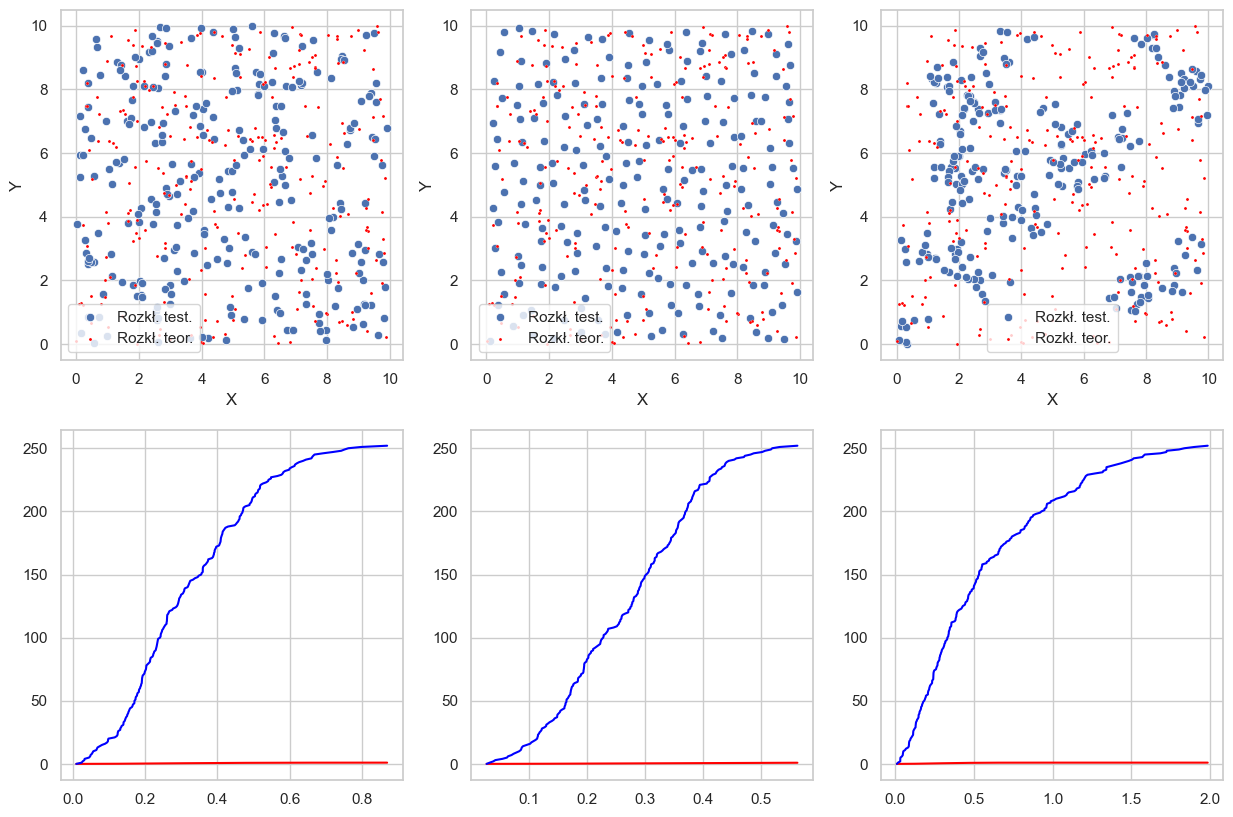

In [36]:
# YOUR CODE HERE

lab_ft = "F_teor(x)"
lab_f = "F_test(x)"
lab_teor = "Rozkł. teor."
lab_test = "Rozkł. test."

fig, axs = plt.subplots(2, 3, figsize = (15,10))

axs[1,0].plot(f_poisson_t['D'], f_poisson_t['F'], color = "red", label = lab_ft)
axs[1,0].plot(f_poisson['D'], f_poisson['F'], color = "blue", label = lab_f)
axs[1,1].plot(f_regular_t['D'], f_regular_t['F'], color = "red", label = lab_ft)
axs[1,1].plot(f_regular['D'], f_regular['F'], color = "blue", label = lab_f)
axs[1,2].plot(f_matern_t['D'], f_matern_t['F'], color = "red", label = lab_ft)
axs[1,2].plot(f_matern['D'], f_matern['F'], color = "blue", label = lab_f)

sns.scatterplot(data = tab_homo_poisson, x = 'X', y = 'Y', ax = axs[0,0], label = lab_test)
sns.scatterplot(data = tab_teor, x = 'X', y = 'Y', ax = axs[0,0], s = 5, color = "red", label = lab_teor)
sns.scatterplot(data = tab_regular, x = 'X', y = 'Y', ax = axs[0,1], label = lab_test)
sns.scatterplot(data = tab_teor, x = 'X', y = 'Y', ax = axs[0,1], s = 5, color = "red", label = lab_teor)
sns.scatterplot(data = tab_matern, x = 'X', y = 'Y', ax = axs[0,2], label = lab_test)
sns.scatterplot(data = tab_teor, x = 'X', y = 'Y', ax = axs[0,2], s = 5, color = "red", label = lab_teor)




#raise NotImplementedError()